In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import glob
import imageio
import PIL
from tensorflow.keras import layers
from tensorflow.keras import models
import time

from IPython import display

In [3]:
pip install imageio

     |████████████████████████████████| 3.3 MB 11.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Label 200 data entries (don't run the code)

In [3]:
files = os.listdir('images/')

In [18]:
files[:200]

['4426_2003.jpg',
 '38921_2012.jpg',
 '55591_2016.jpg',
 '8777_2004.jpg',
 '56274_2017.jpg',
 '24208_2008.jpg',
 '13759_2006.jpg',
 '19302_2007.jpg',
 '14698_2006.jpg',
 '30569_2010.jpg',
 '63444_2019.jpg',
 '49658_2015.jpg',
 '6747_2003.jpg',
 '8981_2004.jpg',
 '6521_2003.jpg',
 '63622_2019.jpg',
 '8511_2004.jpg',
 '56012_2017.jpg',
 '29184_2010.jpg',
 '36938_2012.jpg',
 '19164_2007.jpg',
 '4640_2003.jpg',
 '52636_2016.jpg',
 '58944_2018.jpg',
 '7936_2004.jpg',
 '5818_2003.jpg',
 '12015_2005.jpg',
 '24622_2009.jpg',
 '37760_2012.jpg',
 '32222_2011.jpg',
 '5488_2003.jpg',
 '31957_2010.jpg',
 '26543_2009.jpg',
 '388_2000.jpg',
 '22367_2008.jpg',
 '15636_2006.jpg',
 '15450_2006.jpg',
 '37996_2012.jpg',
 '22101_2008.jpg',
 '53698_2016.jpg',
 '54759_2016.jpg',
 '26725_2009.jpg',
 '42284_2013.jpg',
 '35185_2011.jpg',
 '24444_2009.jpg',
 '37506_2012.jpg',
 '61169_2018.jpg',
 '12273_2005.jpg',
 '39779_2012.jpg',
 '1728_2001.jpg',
 '63623_2019.jpg',
 '8980_2004.jpg',
 '6520_2003.jpg',
 '52637_

In [19]:
hair_len = [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
            0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 
            0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
            0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
            0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
            0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
            0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
            0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
            0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
            0, 1, 1, 0, 0, 1, 1, 1, 1, 1]

In [20]:
len(hair_len)

200

In [25]:
zipped = list(zip(files[:200], hair_len))

In [26]:
zipped

[('4426_2003.jpg', 1),
 ('38921_2012.jpg', 1),
 ('55591_2016.jpg', 0),
 ('8777_2004.jpg', 1),
 ('56274_2017.jpg', 0),
 ('24208_2008.jpg', 1),
 ('13759_2006.jpg', 1),
 ('19302_2007.jpg', 1),
 ('14698_2006.jpg', 1),
 ('30569_2010.jpg', 0),
 ('63444_2019.jpg', 1),
 ('49658_2015.jpg', 1),
 ('6747_2003.jpg', 0),
 ('8981_2004.jpg', 0),
 ('6521_2003.jpg', 1),
 ('63622_2019.jpg', 1),
 ('8511_2004.jpg', 1),
 ('56012_2017.jpg', 0),
 ('29184_2010.jpg', 1),
 ('36938_2012.jpg', 0),
 ('19164_2007.jpg', 0),
 ('4640_2003.jpg', 0),
 ('52636_2016.jpg', 1),
 ('58944_2018.jpg', 1),
 ('7936_2004.jpg', 1),
 ('5818_2003.jpg', 1),
 ('12015_2005.jpg', 1),
 ('24622_2009.jpg', 0),
 ('37760_2012.jpg', 0),
 ('32222_2011.jpg', 1),
 ('5488_2003.jpg', 1),
 ('31957_2010.jpg', 1),
 ('26543_2009.jpg', 1),
 ('388_2000.jpg', 0),
 ('22367_2008.jpg', 0),
 ('15636_2006.jpg', 1),
 ('15450_2006.jpg', 0),
 ('37996_2012.jpg', 1),
 ('22101_2008.jpg', 0),
 ('53698_2016.jpg', 1),
 ('54759_2016.jpg', 1),
 ('26725_2009.jpg', 1),
 ('4

In [28]:
df = pd.DataFrame(zipped)
df.columns = ['file', 'hair_len']
df.head()

,file,hair_len
0,4426_2003.jpg,1
1,38921_2012.jpg,1
2,55591_2016.jpg,0
3,8777_2004.jpg,1
4,56274_2017.jpg,0


In [29]:
df['hair_len'].value_counts()

1    115
0     85
Name: hair_len, dtype: int64

In [30]:
df.to_csv('with_label.csv')

# Access labeled data with csv file

In [4]:
images = []

for file in files:
    image = PIL.Image.open('images/' + file)
    image = image.resize((28, 28))
    images.append(np.array(image) / 255.0)

In [5]:
np.array(images).shape

(63565, 28, 28, 3)

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices(images).shuffle(63565).batch(256)

In [6]:
generator = models.Sequential()

generator.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Reshape((7, 7, 256)))
assert generator.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

generator.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
assert generator.output_shape == (None, 7, 7, 128)
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
assert generator.output_shape == (None, 14, 14, 64)
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
assert generator.output_shape == (None, 28, 28, 3)

In [7]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)



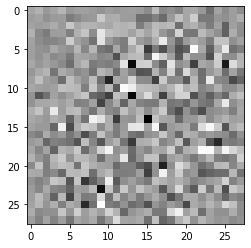

In [8]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [49]:
discriminator = tf.keras.Sequential()
discriminator.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                 input_shape=[28, 28, 3]))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.3))

discriminator.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.3))

discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1))

In [51]:
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00439999]], shape=(1, 1), dtype=float32)


In [10]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [11]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [12]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [13]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [15]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=dis)

In [16]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [27]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [53]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([256, noise_dim])


    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:


        generated_images = generator(noise, training=True)
    

        real_output = discriminator(images, training=True)


        fake_output = discriminator(generated_images, training=True)


        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [54]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        # Produce images for the GIF as you go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                                 epoch + 1,
                                 seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

        # Generate after the final epoch
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                               epochs,
                               seed)

In [ ]:
train(train_dataset, 50)